In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [229]:
data = pd.read_csv('train.csv')
print(data.shape)
data.tail(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [230]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.drop('Name', inplace=True, axis=1)
data.drop('Cabin', inplace=True, axis=1)
data.drop('Ticket', inplace = True, axis=1)
data.drop('PassengerId', inplace = True, axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [232]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [233]:
data = pd.get_dummies(data)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [234]:
data.isnull().sum()
data.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

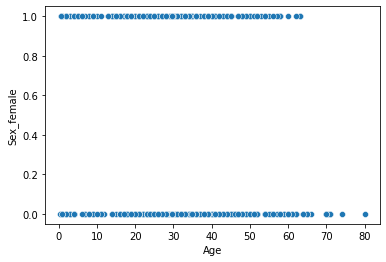

In [235]:
sns.scatterplot(x='Age', y='Sex_female', data=data)

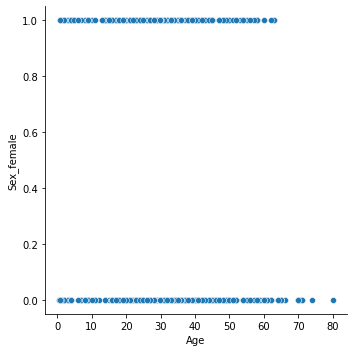

In [236]:
sns.relplot(x='Age', y='Sex_female', data=data)

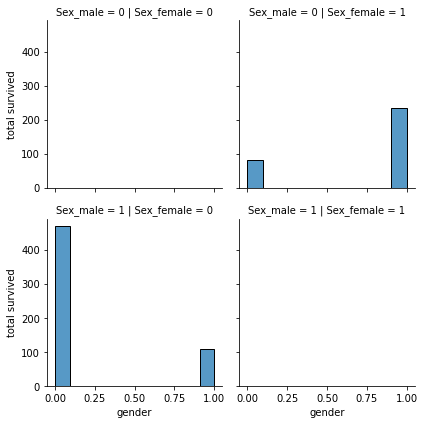

In [237]:
g = sns.FacetGrid(data, col='Sex_female', row='Sex_male')
g.map_dataframe(sns.histplot, x='Survived')
g.set_axis_labels('gender', 'total survived')

In [238]:
data['Sex_male'].value_counts()

1    577
0    314
Name: Sex_male, dtype: int64

In [239]:
pd.crosstab(data['Survived'], data['Sex_male'], normalize=True)*100

Sex_male,0,1
Survived,,
0,9.090909,52.525253
1,26.150393,12.233446


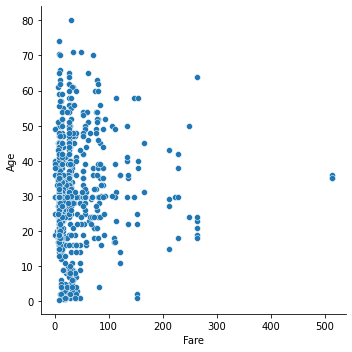

In [240]:
sns.relplot(x = 'Fare', y = 'Age', data=data)

<Figure size 576x360 with 0 Axes>

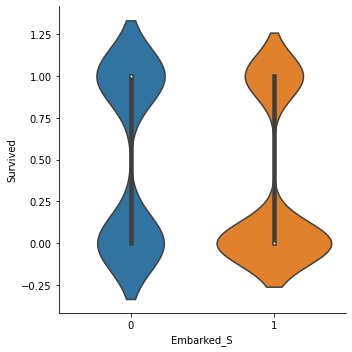

In [241]:
plt.figure(figsize=(8,5))
sns.catplot(x='Embarked_S', y='Survived', kind='violin', data=data)

In [242]:
pd.crosstab(data['Survived'], data['Parch'], normalize=True)*100

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,49.943883,5.948373,4.489338,0.224467,0.448934,0.448934,0.112233
1,26.150393,7.295174,4.489338,0.336700,0.000000,0.112233,0.000000


In [243]:
pd.crosstab(data['Survived'], data['Pclass'], normalize=True)*100

Pclass,1,2,3
Survived,,,
0,8.978676,10.886644,41.750842
1,15.263749,9.764310,13.355780


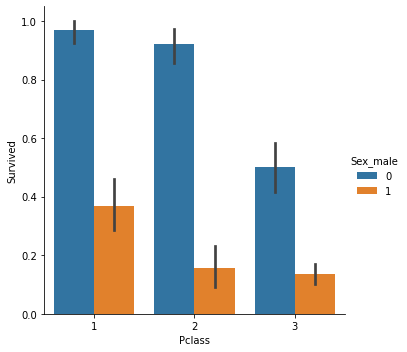

In [244]:
sns.catplot(x="Pclass", y="Survived", hue="Sex_male", kind='bar', data=data)

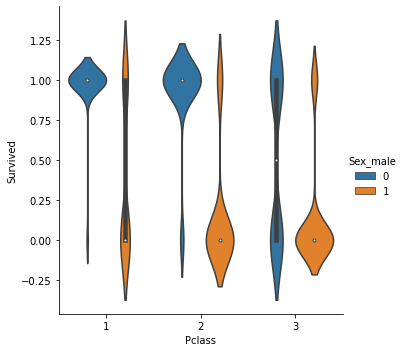

In [245]:
sns.catplot(x="Pclass", y="Survived", hue="Sex_male", kind='violin', data=data)


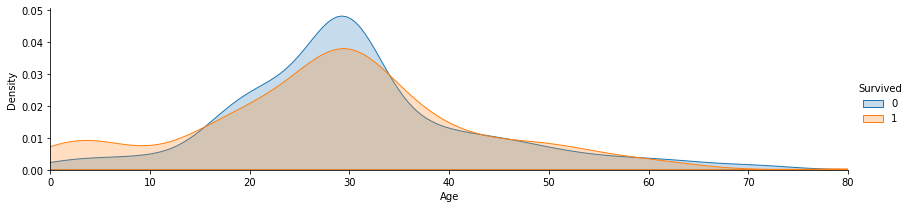

In [246]:
graph = sns.FacetGrid(data, hue = 'Survived', aspect=4)
graph.map(sns.kdeplot, 'Age', shade= True )
graph.set(xlim=(0 , data['Age'].max()))
graph.add_legend()

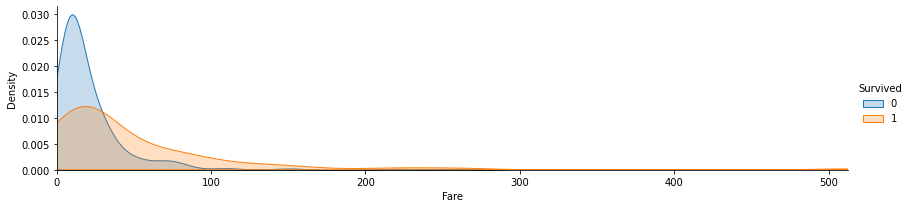

In [247]:
graph = sns.FacetGrid(data, hue = 'Survived', aspect=4)
graph.map(sns.kdeplot, 'Fare', shade= True )
graph.set(xlim=(0 , data['Fare'].max()))
graph.add_legend()

In [248]:
corr = data.corr()
corr.shape

(11, 11)

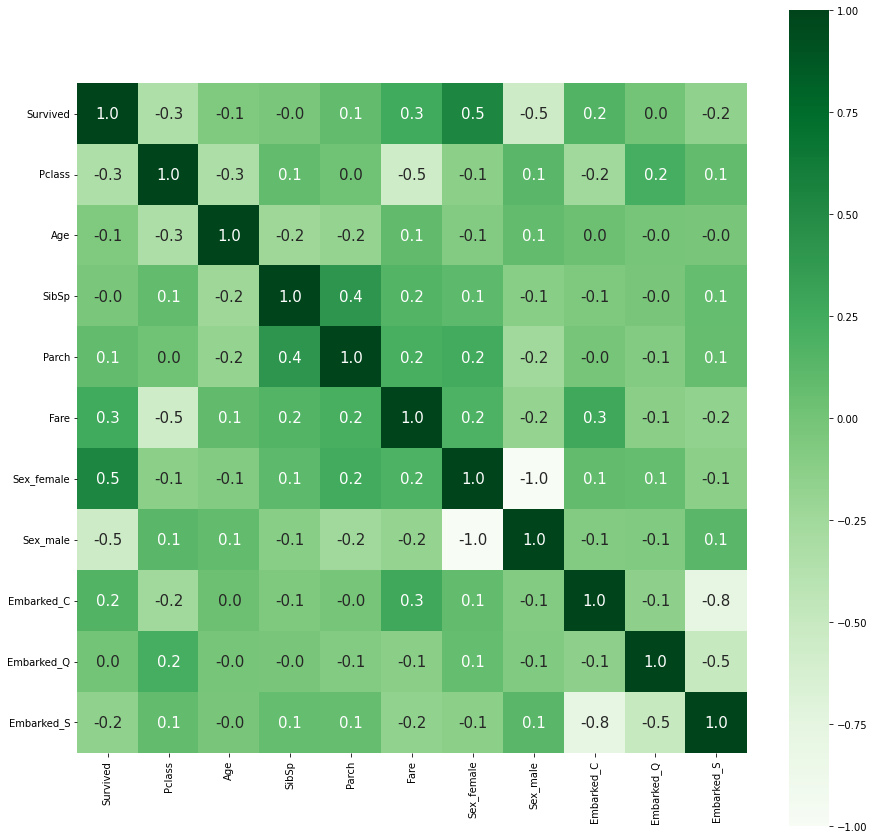

In [249]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

In [250]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=5)

In [253]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [254]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [255]:
metrics.accuracy_score(y_test, y_pred)

0.8141025641025641

###Applying Decision Tree

In [256]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [257]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=48, splitter='random', max_features='log2', min_samples_leaf=2, min_samples_split=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='random')

In [258]:
y_predict = classifier.predict(X_test)

In [259]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusionmatrix = confusion_matrix(y_test, y_predict)
print(confusionmatrix)
print(classification_report(y_test, y_predict))
accuracy_score(y_test, y_predict)

[[190   9]
 [ 43  70]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       199
           1       0.89      0.62      0.73       113

    accuracy                           0.83       312
   macro avg       0.85      0.79      0.80       312
weighted avg       0.84      0.83      0.83       312



0.8333333333333334

###Applying KNN

In [260]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

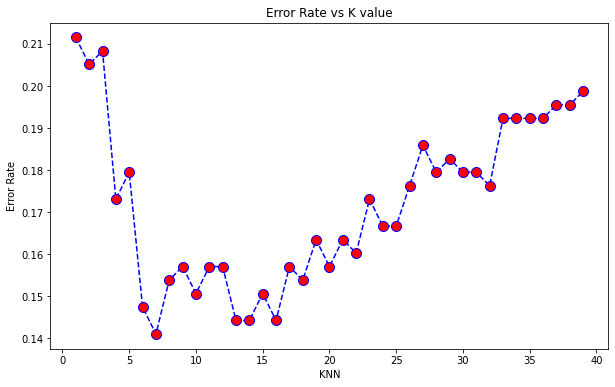

In [261]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('KNN')
plt.ylabel('Error Rate')

In [262]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.8359240069084629

In [263]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[185  14]
 [ 30  83]]


###Applying Naive Bayes

[[167  32]
 [ 30  83]]
0.8012820512820513


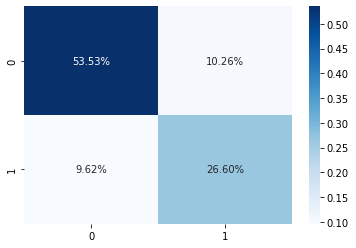

In [264]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
print(cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
ac = accuracy_score(y_test, y_prediction)
print(ac)

###Applying Random Forest Algorithm

In [265]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [266]:
rfc = RandomForestClassifier(n_estimators = 10000, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
rfc_predicted_on_test = rfc.predict(X_test)
print(f1_score(y_test, rfc_predicted_on_test))
cm = confusion_matrix(y_test, rfc_predicted_on_test)
print(cm)

0.7454545454545454
[[174  25]
 [ 31  82]]


In [267]:
!pip install xgboost

In [268]:
import xgboost as xgb
from xgboost import XGBClassifier

In [269]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [270]:
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

84.2948717948718


###Applying SVM

In [271]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [272]:
y_prediction_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_prediction_test)
print(cm)
accuracy_score(y_test, y_prediction_test)

[[184  15]
 [ 36  77]]


0.8365384615384616